In [31]:
# Load the data from the xlsx file 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sales_data = pd.read_excel('Data/SalesData.xlsx')

In [32]:
# Display the first 5 rows of the data and analyze the data
sales_data.head()

,Transaction_Type,Tran_Date,Store_Num,Tran_Amt,Emp_Num,Category,Num_Items,Satisfaction
0,Purchase,2020-01-01,101,1.99,201,Misc,1,2
1,Purchase,2020-01-01,101,19.99,201,Grocery,2,1
2,Purchase,2020-01-01,101,99.99,201,Elect,3,1
3,Purchase,2020-01-01,101,45.12,201,Elect,7,1
4,Purchase,2020-01-01,101,32.35,201,Elect,8,5


In [33]:
sales_data.describe()

,Tran_Date,Store_Num,Tran_Amt,Emp_Num,Num_Items,Satisfaction
count,282,282.000000,282.000000,282.000000,282.000000,282.000000
mean,2020-01-02 07:29:21.702127616,101.500000,107.363085,253.790780,9.684397,2.968085
min,2020-01-01 00:00:00,101.000000,0.790000,201.000000,1.000000,1.000000
25%,2020-01-02 00:00:00,101.000000,33.000000,203.000000,4.000000,2.000000
50%,2020-01-03 00:00:00,101.500000,98.000000,253.000000,7.000000,3.000000
75%,2020-01-03 00:00:00,102.000000,174.000000,305.000000,10.000000,4.000000
max,2020-01-03 00:00:00,102.000000,351.190000,309.000000,70.000000,5.000000
std,NaN,0.500889,81.831790,51.151462,9.346419,1.427629


In [34]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_Type  282 non-null    object        
 1   Tran_Date         282 non-null    datetime64[ns]
 2   Store_Num         282 non-null    int64         
 3   Tran_Amt          282 non-null    float64       
 4   Emp_Num           282 non-null    int64         
 5   Category          282 non-null    object        
 6   Num_Items         282 non-null    int64         
 7   Satisfaction      282 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 17.8+ KB


In [35]:
sales_data['Transaction_Type'].value_counts()

Transaction_Type
Purchase    248
Return       34
Name: count, dtype: int64

In [36]:
sales_data['Store_Num'].value_counts()

Store_Num
101    141
102    141
Name: count, dtype: int64

In [37]:
sales_data['Emp_Num'].value_counts()

Emp_Num
201    53
205    34
204    23
303    21
306    19
301    18
202    17
304    17
305    17
308    15
203    14
307    13
309    11
302    10
Name: count, dtype: int64

In [38]:
sales_data['Category'].value_counts()

Category
Grocery    160
Misc        59
Beauty      39
Elect       24
Name: count, dtype: int64

In [39]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sales_data, test_size=0.2, random_state=42)

In [40]:
# copy the training data to a sales_data variable
sales_data = train_data.copy()

array([[<Axes: title={'center': 'Tran_Date'}>,
        <Axes: title={'center': 'Store_Num'}>],
       [<Axes: title={'center': 'Tran_Amt'}>,
        <Axes: title={'center': 'Emp_Num'}>],
       [<Axes: title={'center': 'Num_Items'}>,
        <Axes: title={'center': 'Satisfaction'}>]], dtype=object)

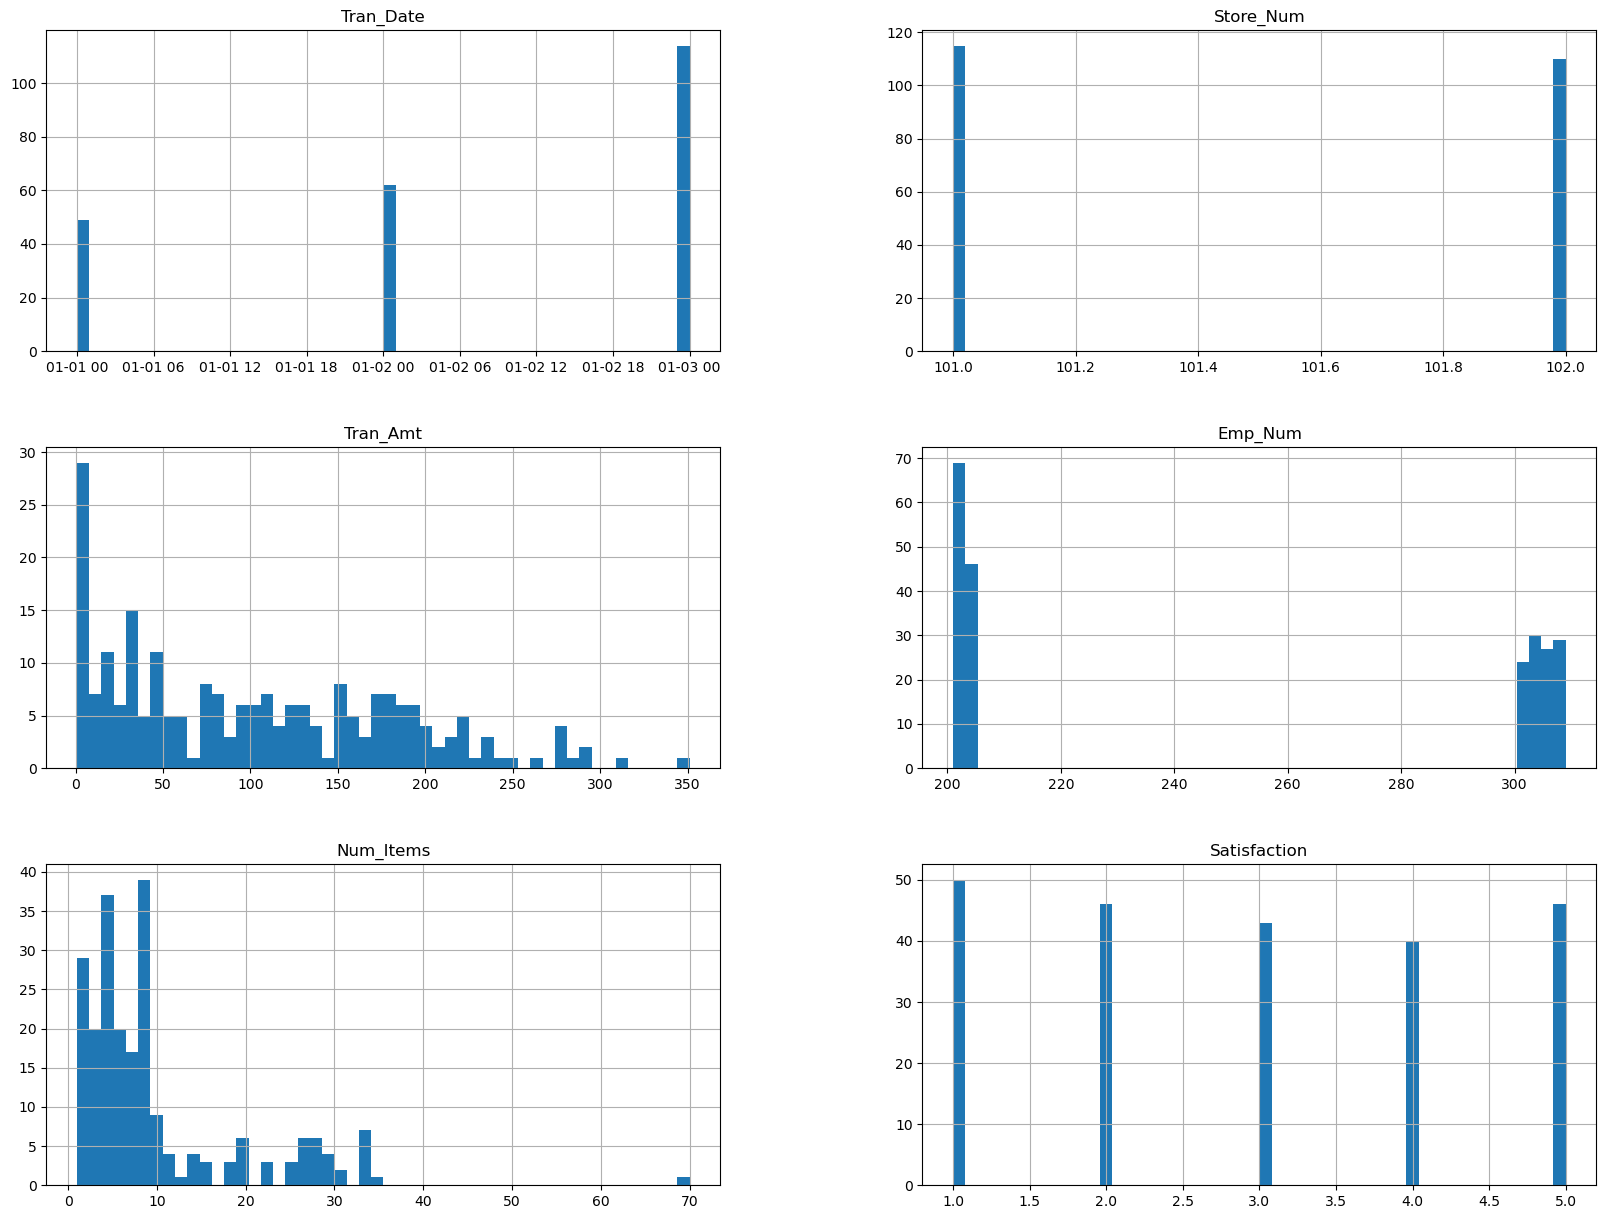

In [41]:
# show the histogram of the data
sales_data.hist(bins=50, figsize=(20,15))

In [42]:
# Find the correlation between the data with the transaction amount
corr_matrix = sales_data.drop(['Transaction_Type', 'Category', 'Tran_Date'], axis=1).corr()

In [43]:
corr_matrix

,Store_Num,Tran_Amt,Emp_Num,Num_Items,Satisfaction
Store_Num,1.000000,0.035710,0.999127,-0.466388,0.066774
Tran_Amt,0.035710,1.000000,0.036385,0.174723,-0.058062
Emp_Num,0.999127,0.036385,1.000000,-0.461886,0.069632
Num_Items,-0.466388,0.174723,-0.461886,1.000000,0.045340
Satisfaction,0.066774,-0.058062,0.069632,0.045340,1.000000


As see per the correlation matrix, the transaction amount is highly correlated with the quantity of the product and the price of the product. The transaction amount is also correlated with the store number and the employee number. The store number and the employee number are not correlated with the price of the product.

In [44]:
# Add field weekday to the data from the transaction date to find correlation with the transaction amount
sales_data['Weekday'] = sales_data['Tran_Date'].dt.dayofweek

In [45]:
sales_data['Weekday'].value_counts()

Weekday
4    114
3     62
2     49
Name: count, dtype: int64

In [46]:
# Find the correlation between the weekday and the transaction amount
corr_matrix = sales_data.drop(['Transaction_Type', 'Category', 'Tran_Date'], axis=1).corr()

In [47]:
corr_matrix

,Store_Num,Tran_Amt,Emp_Num,Num_Items,Satisfaction,Weekday
Store_Num,1.000000,0.035710,0.999127,-0.466388,0.066774,-0.030848
Tran_Amt,0.035710,1.000000,0.036385,0.174723,-0.058062,0.286202
Emp_Num,0.999127,0.036385,1.000000,-0.461886,0.069632,-0.025746
Num_Items,-0.466388,0.174723,-0.461886,1.000000,0.045340,0.285360
Satisfaction,0.066774,-0.058062,0.069632,0.045340,1.000000,-0.003674
Weekday,-0.030848,0.286202,-0.025746,0.285360,-0.003674,1.000000


In [48]:
# Find any missing values in the data
sales_data.isnull().sum()

Transaction_Type    0
Tran_Date           0
Store_Num           0
Tran_Amt            0
Emp_Num             0
Category            0
Num_Items           0
Satisfaction        0
Weekday             0
dtype: int64

There are no missing values in the training data so we can proceed with the data preparation.

In [49]:
# Prepare the data for the model
# Perform one hot encoding on the transaction type and the category
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
transaction_type_1hot = encoder.fit_transform(sales_data[['Transaction_Type']])
category_1hot = encoder.fit_transform(sales_data[['Category']])

In [50]:
transaction_type_1hot

<225x2 sparse matrix of type '<class 'numpy.float64'>'
	with 225 stored elements in Compressed Sparse Row format>

In [51]:
category_1hot

<225x4 sparse matrix of type '<class 'numpy.float64'>'
	with 225 stored elements in Compressed Sparse Row format>

In [52]:

sales_data

,Transaction_Type,Tran_Date,Store_Num,Tran_Amt,Emp_Num,Category,Num_Items,Satisfaction,Weekday
139,Return,2020-01-03,101,237.00,205,Misc,28,4,4
193,Purchase,2020-01-02,102,20.00,303,Grocery,3,5,3
19,Return,2020-01-01,101,1.99,205,Misc,1,1,2
159,Purchase,2020-01-01,102,133.00,304,Grocery,4,1,2
140,Return,2020-01-03,101,276.00,205,Grocery,25,1,4
...,...,...,...,...,...,...,...,...,...
188,Purchase,2020-01-02,102,96.00,303,Grocery,9,2,3
71,Purchase,2020-01-03,101,30.00,204,Grocery,10,2,4
106,Purchase,2020-01-03,101,169.00,201,Misc,28,5,4
270,Purchase,2020-01-03,102,153.00,309,Grocery,1,4,4


The above-mentioned code is to follow the book models, which can not be applied to get a meaningful insight from the date, so the remaining code will be different from the book.

In [53]:
# Get the data in the row form again
sales_data = pd.read_excel('Data/SalesData.xlsx')

In [54]:
# Convert Tran_Date to datetime format
sales_data['Tran_Date'] = pd.to_datetime(sales_data['Tran_Date'])

In [55]:
# Feature Engineering: extract the day, month, year, and weekday from the Tran_Date
sales_data['Day'] = sales_data['Tran_Date'].dt.day
sales_data['Month'] = sales_data['Tran_Date'].dt.month
sales_data['Day_of_Week'] = sales_data['Tran_Date'].dt.dayofweek

In [56]:
# Calculate average satisfaction by date
average_satisfaction = sales_data.groupby('Tran_Date')['Satisfaction'].mean().reset_index()
average_satisfaction.columns = ['Tran_Date', 'Average_Satisfaction']

In [57]:
# Merge the average satisfaction with the sales data
sales_data = pd.merge(sales_data, average_satisfaction, on='Tran_Date')

In [60]:
sales_data.head()

,Transaction_Type,Tran_Date,Store_Num,Tran_Amt,Emp_Num,Category,Num_Items,Satisfaction,Day,Month,Day_of_Week,Average_Satisfaction
0,Purchase,2020-01-01,101,1.99,201,Misc,1,2,1,1,2,3.0
1,Purchase,2020-01-01,101,19.99,201,Grocery,2,1,1,1,2,3.0
2,Purchase,2020-01-01,101,99.99,201,Elect,3,1,1,1,2,3.0
3,Purchase,2020-01-01,101,45.12,201,Elect,7,1,1,1,2,3.0
4,Purchase,2020-01-01,101,32.35,201,Elect,8,5,1,1,2,3.0


In [61]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Transaction_Type      282 non-null    object        
 1   Tran_Date             282 non-null    datetime64[ns]
 2   Store_Num             282 non-null    int64         
 3   Tran_Amt              282 non-null    float64       
 4   Emp_Num               282 non-null    int64         
 5   Category              282 non-null    object        
 6   Num_Items             282 non-null    int64         
 7   Satisfaction          282 non-null    int64         
 8   Day                   282 non-null    int32         
 9   Month                 282 non-null    int32         
 10  Day_of_Week           282 non-null    int32         
 11  Average_Satisfaction  282 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(2)
memory usage: 

In [63]:
# Prepare the data for the model
features = ['Store_Num', 'Emp_Num', 'Day', 'Month', 'Day_of_Week', 'Average_Satisfaction', 'Category', 'Transaction_Type', 'Num_Items']
X = sales_data[features]  # Features
y = sales_data['Tran_Amt']  # Target variable

In [64]:
# Perform one hot encoding on the transaction type, store number, employee number and the category
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
transaction_type_1hot = encoder.fit_transform(X[['Transaction_Type']])
store_num_1hot = encoder.fit_transform(X[['Store_Num']])
emp_num_1hot = encoder.fit_transform(X[['Emp_Num']])
category_1hot = encoder.fit_transform(X[['Category']])

In [65]:
# Concatenate the one hot encoded data with the original data
from scipy.sparse import hstack
X = hstack((transaction_type_1hot, store_num_1hot, emp_num_1hot, category_1hot, X.drop(['Transaction_Type', 'Store_Num', 'Emp_Num', 'Category'], axis=1)))

In [66]:
X

<282x27 sparse matrix of type '<class 'numpy.float64'>'
	with 2538 stored elements in COOrdinate format>

In [67]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Train the model
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [69]:
# Evaluate the Linear Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred_lin_reg = lin_reg.predict(X_train)

lin_mse = mean_squared_error(y_train, y_pred_lin_reg)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(y_train, y_pred_lin_reg)

print(f'Linear Regression RMSE: {lin_rmse}')
print(f'Linear Regression MAE: {lin_mae}')

Linear Regression RMSE: 69.88525712412581
Linear Regression MAE: 56.26244610720998


In [70]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_red_tree = DecisionTreeRegressor(random_state=42)
dt_red_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [71]:
# Evaluate the Decision Tree Regressor model
y_pred_dt_red_tree = dt_red_tree.predict(X_train)

dt_red_tree_mse = mean_squared_error(y_train, y_pred_dt_red_tree)
dt_red_tree_rmse = np.sqrt(dt_red_tree_mse)
dt_red_tree_mae = mean_absolute_error(y_train, y_pred_dt_red_tree)

print(f'Decision Tree Regressor RMSE: {dt_red_tree_rmse}')
print(f'Decision Tree Regressor MAE: {dt_red_tree_mae}')

Decision Tree Regressor RMSE: 16.640478376314565
Decision Tree Regressor MAE: 4.809303703703703


In [72]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [73]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

In [74]:
# Evaluate the Random Forest Regressor model
best_rf_reg = grid_search.best_estimator_
y_pred_rf_reg = best_rf_reg.predict(X_test)

rf_reg_mse = mean_squared_error(y_test, y_pred_rf_reg)
rf_reg_rmse = np.sqrt(rf_reg_mse)
rf_reg_mae = mean_absolute_error(y_test, y_pred_rf_reg)

print(f'Random Forest Regressor RMSE: {rf_reg_rmse}')
print(f'Random Forest Regressor MAE: {rf_reg_mae}')

Random Forest Regressor RMSE: 76.88618605699547
Random Forest Regressor MAE: 62.528888713831016
